<a href="https://colab.research.google.com/github/GarganoNicolas/stroke/blob/main/stroke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data5 = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')

In [ ]:
from funpymodeling import profiling_num, freq_tbl, status

In [ ]:
data5.shape

(5110, 12)

# EXPLORING DATA AND MAKING USER INTERFACE (INPUT)

In [ ]:
status(data5)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,5110,int64
1,gender,0,0.000000,0,0.000000,3,object
2,age,0,0.000000,0,0.000000,104,float64
3,hypertension,0,0.000000,4612,0.902544,2,int64
4,heart_disease,0,0.000000,4834,0.945988,2,int64
5,ever_married,0,0.000000,0,0.000000,2,object
6,work_type,0,0.000000,0,0.000000,5,object
7,Residence_type,0,0.000000,0,0.000000,2,object
8,avg_glucose_level,0,0.000000,0,0.000000,3979,float64
9,bmi,201,0.039335,0,0.000000,418,float64


In [ ]:
data5=data5.drop('id', axis=1)
data5.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
#data is imbalanced (I dont have to much resource, so I will make underfit to make a cheaper model)
data5['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [ ]:
#for the interface I need yes and no, and also to compare objet columns is usefull
data5[["hypertension", "heart_disease", "stroke"]] = data5[["hypertension", "heart_disease", "stroke"]].replace({0: "No", 1: "Yes"})
print(data5["hypertension"].unique())
print(data5["heart_disease"].unique())
print(data5["stroke"].unique())

['No' 'Yes']
['Yes' 'No']
['Yes' 'No']


In [ ]:
freq_tbl(data5)

   gender  frequency  percentage  cumulative_perc
0  Female       2994    0.585910         0.585910
1    Male       2115    0.413894         0.999804
2   Other          1    0.000196         1.000000

----------------------------------------------------------------

  hypertension  frequency  percentage  cumulative_perc
0           No       4612    0.902544         0.902544
1          Yes        498    0.097456         1.000000

----------------------------------------------------------------

  heart_disease  frequency  percentage  cumulative_perc
0            No       4834    0.945988         0.945988
1           Yes        276    0.054012         1.000000

----------------------------------------------------------------

  ever_married  frequency  percentage  cumulative_perc
0          Yes       3353    0.656164         0.656164
1           No       1757    0.343836         1.000000

----------------------------------------------------------------

       work_type  frequency  perce

In [ ]:
pd.set_option('display.max_columns', None)
dataYes = data5[data5['stroke']=='Yes']
dataYes.head(3)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes


In [ ]:
pd.reset_option('display.max_columns')

In [ ]:
freq_tbl(dataYes)

   gender  frequency  percentage  cumulative_perc
0  Female        141    0.566265         0.566265
1    Male        108    0.433735         1.000000

----------------------------------------------------------------

  hypertension  frequency  percentage  cumulative_perc
0           No        183     0.73494          0.73494
1          Yes         66     0.26506          1.00000

----------------------------------------------------------------

  heart_disease  frequency  percentage  cumulative_perc
0            No        202    0.811245         0.811245
1           Yes         47    0.188755         1.000000

----------------------------------------------------------------

  ever_married  frequency  percentage  cumulative_perc
0          Yes        220    0.883534         0.883534
1           No         29    0.116466         1.000000

----------------------------------------------------------------

       work_type  frequency  percentage  cumulative_perc
0        Private        149

In [ ]:
profiling_num(data5)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,age,43.226614,22.612647,0.523119,1.0800,5.0000,25.000,45.000,61.00,79.0000,82.0000
1,avg_glucose_level,106.147677,45.283560,0.426609,56.3309,60.7135,77.245,91.885,114.09,216.2945,240.7082
2,bmi,28.893237,7.854067,0.271831,15.1000,17.6400,23.500,28.100,33.10,42.9600,53.4000


In [ ]:
profiling_num(dataYes)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,age,67.728193,12.727419,0.187919,34.8800,45.400,59.00,71.00,78.00,81.000,82.0000
1,avg_glucose_level,132.544739,61.921056,0.467171,58.0068,62.156,79.79,105.22,196.71,236.902,256.3132
2,bmi,30.471292,6.329452,0.207719,19.6400,21.740,26.40,29.70,33.70,42.460,47.3800


In [ ]:
data51=data5[data5['age']>=35]
data51.shape

(3265, 11)

In [ ]:
display(freq_tbl(data51['ever_married']))
display(freq_tbl(data51['work_type']))
display(freq_tbl(data51['stroke']))

,ever_married,frequency,percentage,cumulative_perc
0,Yes,2954,0.904747,0.904747
1,No,311,0.095253,1.000000


,work_type,frequency,percentage,cumulative_perc
0,Private,1967,0.602450,0.602450
1,Self-employed,744,0.227871,0.830322
2,Govt_job,554,0.169678,1.000000


,stroke,frequency,percentage,cumulative_perc
0,No,3019,0.924655,0.924655
1,Yes,246,0.075345,1.000000


In [ ]:
freq_tbl(data51['ever_married'])

,ever_married,frequency,percentage,cumulative_perc
0,Yes,2954,0.904747,0.904747
1,No,311,0.095253,1.000000


In [ ]:
# we loss 3 cases of stroke over 2000 cases. I will keep the people over 35,
# Also I think the cases under 35 can be studies in diferent ways than the older people, has another factors to analyze

In [ ]:
pd.crosstab(data51.stroke, data51.ever_married, normalize=True)

ever_married,No,Yes
stroke,,
No,0.086983,0.837672
Yes,0.008270,0.067075


In [ ]:
display(freq_tbl(data51['ever_married']))
display(freq_tbl(dataYes['ever_married']))
display(data5.groupby('stroke')['ever_married'].describe())
display(data51.groupby('stroke')['ever_married'].describe())

,ever_married,frequency,percentage,cumulative_perc
0,Yes,2954,0.904747,0.904747
1,No,311,0.095253,1.000000


,ever_married,frequency,percentage,cumulative_perc
0,Yes,220,0.883534,0.883534
1,No,29,0.116466,1.000000


,count,unique,top,freq
stroke,,,,
No,4861,2,Yes,3133
Yes,249,2,Yes,220


,count,unique,top,freq
stroke,,,,
No,3019,2,Yes,2735
Yes,246,2,Yes,219


In [ ]:
display(freq_tbl(data51['Residence_type']))
display(freq_tbl(dataYes['Residence_type']))
display(data5.groupby('stroke')['Residence_type'].describe())
display(data51.groupby('stroke')['Residence_type'].describe())

,Residence_type,frequency,percentage,cumulative_perc
0,Urban,1663,0.509342,0.509342
1,Rural,1602,0.490658,1.000000


,Residence_type,frequency,percentage,cumulative_perc
0,Urban,135,0.542169,0.542169
1,Rural,114,0.457831,1.000000


,count,unique,top,freq
stroke,,,,
No,4861,2,Urban,2461
Yes,249,2,Urban,135


,count,unique,top,freq
stroke,,,,
No,3019,2,Urban,1529
Yes,246,2,Urban,134


In [ ]:
filename = "dataOver35.csv"
data51.to_csv(filename, index = False)
# I export and see the correlations on Pandas Report Profile other Colab, becase it crashed on this env
# https://colab.research.google.com/drive/1oBoFTxfQzrl_EHfAo6921y3AQ3tp-Qn0?usp=sharing
# I will keep the over 35 data

### Let the dataframe ready for the inputs in gradio

In [ ]:
data4 = data51.copy()
data4 = data4.drop('stroke', axis=1)
status(data4)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.000000,0,0.0,2,object
1,age,0,0.000000,0,0.0,48,float64
2,hypertension,0,0.000000,0,0.0,2,object
3,heart_disease,0,0.000000,0,0.0,2,object
4,ever_married,0,0.000000,0,0.0,2,object
5,work_type,0,0.000000,0,0.0,3,object
6,Residence_type,0,0.000000,0,0.0,2,object
7,avg_glucose_level,0,0.000000,0,0.0,2831,float64
8,bmi,154,0.047167,0,0.0,360,float64
9,smoking_status,0,0.000000,0,0.0,4,object


# 2. Kneading data

In [ ]:
data3=data51.copy()
data3.shape

(3265, 11)

### 2.1 Outliers

<Axes: >

<Axes: >

<Axes: >

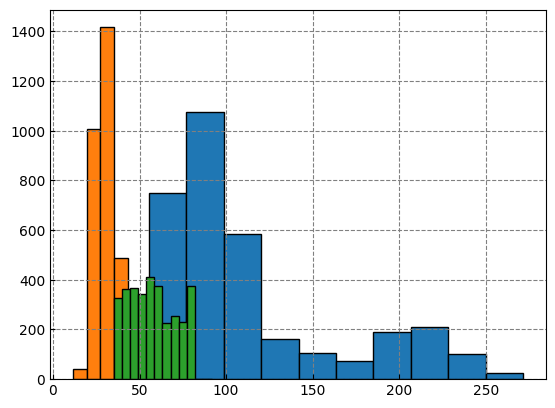

In [ ]:
display(data3['avg_glucose_level'].hist())
display(data3['bmi'].hist())
display(data3['age'].hist())



<Axes: >

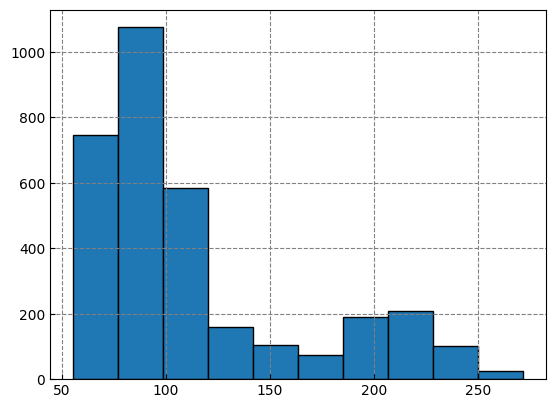

In [ ]:
display(data3['avg_glucose_level'].hist())


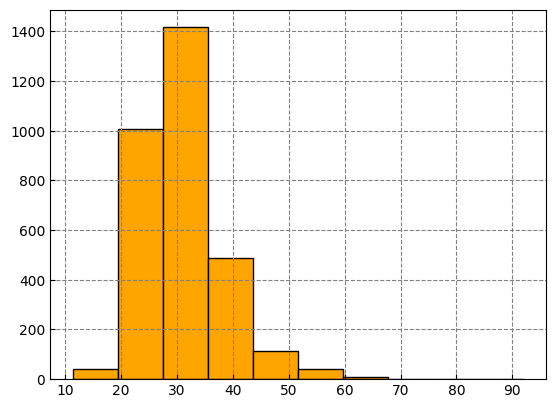

In [ ]:
import matplotlib.pyplot as plt
# Custom style
plt.style.use({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': True,
    'grid.color': 'grey',
    'grid.linestyle': '--',
    'text.color': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'lines.solid_capstyle': 'round',
    'patch.edgecolor': 'black',
    'patch.force_edgecolor': True,
    'image.cmap': 'viridis',
})

data3['bmi'].hist(color='orange')
plt.show()


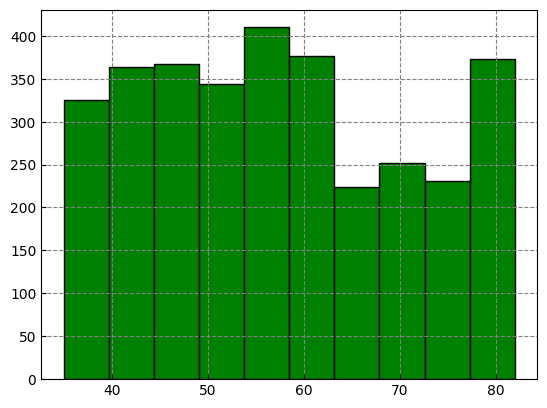

In [ ]:
# green color
data3['age'].hist(color='green')
plt.show()

In [ ]:
# let see BMI
display(data3['bmi'].max())
display(data3['bmi'].mean())
display(data3['bmi'].median())

92.0

30.89726775956284

29.8

In [ ]:
#is posible 92?
data3['bmi'].sort_values().unique()

array([11.3, 11.5, 14.1, 14.2, 15. , 16. , 16.1, 16.4, 16.7, 16.9, 17.3,
       17.4, 17.6, 17.7, 17.9, 18.1, 18.2, 18.3, 18.4, 18.5, 18.7, 18.8,
       19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1,
       20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21. , 21.1, 21.2,
       21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. , 22.1, 22.2, 22.3,
       22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23. , 23.1, 23.2, 23.3, 23.4,
       23.5, 23.6, 23.7, 23.8, 23.9, 24. , 24.1, 24.2, 24.3, 24.4, 24.5,
       24.6, 24.7, 24.8, 24.9, 25. , 25.1, 25.2, 25.3, 25.4, 25.5, 25.6,
       25.7, 25.8, 25.9, 26. , 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7,
       26.8, 26.9, 27. , 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8,
       27.9, 28. , 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9,
       29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8, 29.9, 30. ,
       30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9, 31. , 31.1,
       31.2, 31.3, 31.4, 31.5, 31.6, 31.7, 31.8, 31

In [ ]:
#how much nan are has stroke
bmi = data3[data3['bmi'].isna()]
bmiYes = bmi[bmi['stroke']=='Yes']
bmiYes['stroke'].value_counts()

stroke
Yes    39
Name: count, dtype: int64

In [ ]:
data3['stroke'].value_counts()

stroke
No     3019
Yes     246
Name: count, dtype: int64

### 2.2 Making categories

In [ ]:
data3['age'].sort_values().unique()

array([35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47.,
       48., 49., 50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60.,
       61., 62., 63., 64., 65., 66., 67., 68., 69., 70., 71., 72., 73.,
       74., 75., 76., 77., 78., 79., 80., 81., 82.])

In [ ]:
data3['avg_glucose_level'].sort_values().unique()

array([ 55.22,  55.23,  55.26, ..., 267.61, 267.76, 271.74])

In [ ]:
# I will only make categories in bmi
dataBinsTest = data51.copy()
data3['bmi'], saved_bins_bmi = pd.qcut(
    data3['bmi'],
    q=10, duplicates='drop',
    retbins=True
    )

import pickle

with open('saved_bins_bmi.pkl', 'wb') as handle:
    pickle.dump(saved_bins_bmi, handle, protocol=pickle.HIGHEST_PROTOCOL)
freq_tbl(data3['bmi'])


,bmi,frequency,percentage,cumulative_perc
0,"(26.9, 28.4]",326,0.099847,0.104789
1,"(33.3, 35.8]",321,0.098315,0.207972
2,"(11.299000000000001, 23.3]",319,0.097703,0.310511
3,"(23.3, 25.3]",314,0.096172,0.411443
4,"(28.4, 29.8]",308,0.094334,0.510447
5,"(40.0, 92.0]",308,0.094334,0.609450
6,"(25.3, 26.9]",307,0.094028,0.708132
7,"(29.8, 31.4]",304,0.093109,0.805850
8,"(31.4, 33.3]",304,0.093109,0.903568
9,"(35.8, 40.0]",300,0.091884,1.000000


In [ ]:
dataBinsTest['bmi'].dtype

dtype('float64')

In [ ]:
with open('saved_bins_bmi.pkl', 'rb') as handle:
    saved_bins_bmi = pickle.load(handle)
dataBinsTest["bmi"] = pd.cut(dataBinsTest['bmi'],
                        bins=saved_bins_bmi,
                        include_lowest=True)
dataBinsTest['bmi'].dtype


CategoricalDtype(categories=[(11.299000000000001, 23.3], (23.3, 25.3], (25.3, 26.9], (26.9, 28.4], (28.4, 29.8], (29.8, 31.4], (31.4, 33.3], (33.3, 35.8], (35.8, 40.0], (40.0, 92.0]], ordered=True, categories_dtype=interval[float64, right])

In [ ]:
data3['bmi'] = data3['bmi'].cat.add_categories('null').fillna('null')


In [ ]:
freq_tbl(data3['bmi'])

,bmi,frequency,percentage,cumulative_perc
0,"(26.9, 28.4]",326,0.099847,0.099847
1,"(33.3, 35.8]",321,0.098315,0.198162
2,"(11.299000000000001, 23.3]",319,0.097703,0.295865
3,"(23.3, 25.3]",314,0.096172,0.392037
4,"(28.4, 29.8]",308,0.094334,0.486371
5,"(40.0, 92.0]",308,0.094334,0.580704
6,"(25.3, 26.9]",307,0.094028,0.674732
7,"(29.8, 31.4]",304,0.093109,0.767841
8,"(31.4, 33.3]",304,0.093109,0.860949
9,"(35.8, 40.0]",300,0.091884,0.952833


In [ ]:
status(data3)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.0,0,0.0,2,object
1,age,0,0.0,0,0.0,48,float64
2,hypertension,0,0.0,0,0.0,2,object
3,heart_disease,0,0.0,0,0.0,2,object
4,ever_married,0,0.0,0,0.0,2,object
5,work_type,0,0.0,0,0.0,3,object
6,Residence_type,0,0.0,0,0.0,2,object
7,avg_glucose_level,0,0.0,0,0.0,2831,float64
8,bmi,0,0.0,0,0.0,11,category
9,smoking_status,0,0.0,0,0.0,4,object


# 3. OHE & Yes No columns

In [ ]:
data2=data3.copy()

In [ ]:
for columna in data4:
    # Verificar si el tipo de dato es "object"
    if data4[columna].dtype == 'object':
        # Obtener los valores únicos de la columna
        valores_unicos = data4[columna].unique()

        # Imprimir los valores únicos de la columna con números secuenciales
        print(f"Valores únicos de la columna {columna}:")
        if len(valores_unicos) < 6:
            for indice, valor in enumerate(valores_unicos):
                print(f"{indice}. {valor}")
        print()

Valores únicos de la columna gender:
0. Male
1. Female

Valores únicos de la columna hypertension:
0. No
1. Yes

Valores únicos de la columna heart_disease:
0. Yes
1. No

Valores únicos de la columna ever_married:
0. Yes
1. No

Valores únicos de la columna work_type:
0. Private
1. Self-employed
2. Govt_job

Valores únicos de la columna Residence_type:
0. Urban
1. Rural

Valores únicos de la columna smoking_status:
0. formerly smoked
1. never smoked
2. smokes
3. Unknown



In [ ]:
data1 = data2.copy()

# Iterar sobre las columnas del DataFrame
for columna in data1:
    # Verificar si el tipo de dato es "object"
    if data1[columna].dtype == 'object':
        # Obtener los valores únicos de la columna
        valores_unicos = data1[columna].unique()
        if len(valores_unicos) < 6:
            # Crear un diccionario de reemplazo
            diccionario_reemplazo = {valor: indice for indice, valor in enumerate(valores_unicos)}

            # Reemplazar los valores en la columna
            data1[columna] = data1[columna].map(diccionario_reemplazo)

# Imprimir el DataFrame con los valores reemplazados
print(data1)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              0             0          0   
1          1  61.0             0              1             0          1   
2          0  80.0             0              0             0          0   
3          1  49.0             0              1             0          0   
4          1  79.0             1              1             0          1   
...      ...   ...           ...            ...           ...        ...   
5105       1  80.0             1              1             0          0   
5106       1  81.0             0              1             0          1   
5107       1  35.0             0              1             0          1   
5108       0  51.0             0              1             0          0   
5109       1  44.0             0              1             0          2   

      Residence_type  avg_glucose_level           bmi  smoking_status  stroke  
0      

In [ ]:
for columna in data1.columns:
    valores_unicos = data1[columna].unique()
    if len(valores_unicos) < 7:
        print(f"Valores únicos en la columna {columna}: {valores_unicos}")

Valores únicos en la columna gender: [0 1]
Valores únicos en la columna hypertension: [0 1]
Valores únicos en la columna heart_disease: [0 1]
Valores únicos en la columna ever_married: [0 1]
Valores únicos en la columna work_type: [0 1 2]
Valores únicos en la columna Residence_type: [0 1]
Valores únicos en la columna smoking_status: [0 1 2 3]
Valores únicos en la columna stroke: [0 1]


In [ ]:
status(data1)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.0,1333,0.408270,2,int64
1,age,0,0.0,0,0.000000,48,float64
2,hypertension,0,0.0,2786,0.853292,2,int64
3,heart_disease,0,0.0,273,0.083614,2,int64
4,ever_married,0,0.0,2954,0.904747,2,int64
5,work_type,0,0.0,1967,0.602450,3,int64
6,Residence_type,0,0.0,1663,0.509342,2,int64
7,avg_glucose_level,0,0.0,0,0.000000,2831,float64
8,bmi,0,0.0,0,0.000000,11,category
9,smoking_status,0,0.0,746,0.228484,4,int64


In [ ]:
data_ohe = pd.get_dummies(data1, dtype=int)
status(data_ohe)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.0,1333,0.408270,2,int64
1,age,0,0.0,0,0.000000,48,float64
2,hypertension,0,0.0,2786,0.853292,2,int64
3,heart_disease,0,0.0,273,0.083614,2,int64
4,ever_married,0,0.0,2954,0.904747,2,int64
5,work_type,0,0.0,1967,0.602450,3,int64
6,Residence_type,0,0.0,1663,0.509342,2,int64
7,avg_glucose_level,0,0.0,0,0.000000,2831,float64
8,smoking_status,0,0.0,746,0.228484,4,int64
9,stroke,0,0.0,246,0.075345,2,int64


## 4. Over Sample Tecnique

In [ ]:
print(data_ohe.shape, '\n')
print(data_ohe['stroke'].value_counts())

(3265, 21) 

stroke
1    3019
0     246
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

X = data_ohe.drop('stroke', axis=1)
y = data_ohe['stroke']


smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

data_ohe_balanced = pd.concat([X_sm, y_sm], axis=1)

display(data_ohe_balanced.shape)
display((data_ohe_balanced['stroke'].value_counts()))
display(status(data_ohe_balanced))

(6038, 21)

stroke
0    3019
1    3019
Name: count, dtype: int64

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,gender,0,0.0,3164,0.524015,2,int64
1,age,0,0.0,0,0.000000,2417,float64
2,hypertension,0,0.0,5362,0.888042,2,int64
3,heart_disease,0,0.0,1174,0.194435,2,int64
4,ever_married,0,0.0,5690,0.942365,2,int64
5,work_type,0,0.0,4022,0.666115,3,int64
6,Residence_type,0,0.0,3865,0.640113,2,int64
7,avg_glucose_level,0,0.0,0,0.000000,5604,float64
8,smoking_status,0,0.0,1716,0.284200,4,int64
9,"bmi_(11.299000000000001, 23.3]",0,0.0,5693,0.942862,2,int64


# 5. Save dataFrame

In [ ]:
filename = "data_ohe_balanced.csv"
data_ohe_balanced.to_csv(filename, index = False)

# 6. Lazy Gradio

In [ ]:
# Params Name

columnas = list(data4.columns)
nombres_columnas = ',\n'.join(['"' + columna + '"' for columna in columnas])
print(nombres_columnas)

"gender",
"age",
"hypertension",
"heart_disease",
"ever_married",
"work_type",
"Residence_type",
"avg_glucose_level",
"bmi",
"smoking_status"


In [ ]:
columnas = list(data4.columns)
nombres_columnas = ',\n'.join([columna for columna in columnas])
nombres_columnas = nombres_columnas.rstrip() + ','
print(nombres_columnas)

gender,
age,
hypertension,
heart_disease,
ever_married,
work_type,
Residence_type,
avg_glucose_level,
bmi,
smoking_status,


In [ ]:
# Labels

import numpy as np
columnas4 = data4.columns
for columna in columnas4:


    valor_mas_frecuente = data4[columna].value_counts().idxmax()
    # Verifica el tipo de dato de la columna
    if np.issubdtype(data4[columna].dtype, np.number):
        if len(data4[columna].unique()) <= 5:
            codigo_columna = f"{columna} = gr.Radio(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    choices={data4[columna].unique().tolist()},\n"
            codigo_columna += f"    value={valor_mas_frecuente},\n"
            codigo_columna += f")\n"
            print(codigo_columna)
        else:
            codigo_columna = f"{columna} = gr.Slider(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    minimum={data4[columna].min()},\n"
            codigo_columna += f"    maximum={data4[columna].max()},\n"
            codigo_columna += f"    step=1,\n"
            codigo_columna += f"    randomize=True\n"
            codigo_columna += f")\n"
            print(codigo_columna)
    else:
        # Verifica la cantidad de valores únicos en la columna
        if len(data4[columna].unique()) <= 3:
            codigo_columna = f"{columna} = gr.Radio(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    choices={data4[columna].unique().tolist()},\n"
            codigo_columna += f"    value='{valor_mas_frecuente}',\n"
            codigo_columna += f")\n"
            print(codigo_columna)
        else:
            codigo_columna = f"{columna} = gr.Dropdown(\n"
            codigo_columna += f"    label='{columna.title()}',\n"
            codigo_columna += f"    choices={data4[columna].unique().tolist()},\n"
            codigo_columna += f"    multiselect=False,\n"
            codigo_columna += f"    value='{valor_mas_frecuente}',\n"
            codigo_columna += f")\n"
            print(codigo_columna)

gender = gr.Radio(
    label='Gender',
    choices=['Male', 'Female'],
    value='Female',
)

age = gr.Slider(
    label='Age',
    minimum=35.0,
    maximum=82.0,
    step=1,
    randomize=True
)

hypertension = gr.Radio(
    label='Hypertension',
    choices=['No', 'Yes'],
    value='No',
)

heart_disease = gr.Radio(
    label='Heart_Disease',
    choices=['Yes', 'No'],
    value='No',
)

ever_married = gr.Radio(
    label='Ever_Married',
    choices=['Yes', 'No'],
    value='Yes',
)

work_type = gr.Radio(
    label='Work_Type',
    choices=['Private', 'Self-employed', 'Govt_job'],
    value='Private',
)

Residence_type = gr.Radio(
    label='Residence_Type',
    choices=['Urban', 'Rural'],
    value='Urban',
)

avg_glucose_level = gr.Slider(
    label='Avg_Glucose_Level',
    minimum=55.22,
    maximum=271.74,
    step=1,
    randomize=True
)

bmi = gr.Slider(
    label='Bmi',
    minimum=11.3,
    maximum=92.0,
    step=1,
    randomize=True
)

smoking_status = gr.Dropdown(
    lab